In [1]:
%matplotlib notebook
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import scipy
from scipy.ndimage import gaussian_filter1d as gf1d
from scipy.ndimage import gaussian_filter as gf
from scipy.ndimage import uniform_filter as uf
import sys
#sys.path.append(directory+":\\Chris\\code\\DDM\\")
import tiff_file
import ddm_clean as ddm

import io 
import sys
import csv
import os
import glob #glob is helpful for searching for filenames or directories
import pickle #for saving data

Z:\Gregor L\__Kai Colloids\SIA\Code\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
Z:\Gregor L\__Kai Colloids\SIA\Code\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
Z:\Gregor L\__Kai Colloids\SIA\Code\tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


## Image autocorrelation function defined below

In [47]:
def im_corr(image, filter=True, filtersize=100):
    '''
    Computes image autocorrelation. 
    Takes as input:
        image: 2D image
        filter: Boolean, if true will filter image with uniform filter
        filtersize: size for uniform filtering
        
    Returns:
        corr_im: the image autocorrelation (this will be same size as image)
        rav_corr: radially averaged image autocorrelation
    '''
    
    if filter:
        image = image*1.0 - uf(image,filtersize)
    image = 1.0*image-image.mean() #subtract mean
    image = image/image.std() #normalize by standard deviation
    corr_im = abs(fftshift(ifft2(fft2(image)*np.conj(fft2(image)))))/(image.shape[0]*image.shape[1])
    
    #radial average taken
    rav_corr = ddm.newRadav(corr_im)
    
    
    return corr_im, rav_corr

def filtimage(image, filtersize=80):
    image = image*1.0 - uf(image,filtersize)
    return image

def last_3chars(x):
    return((x.split('\\')[-1])[-7:-4])
#last_3chars(files[0])

In [62]:
###################################################################################
# Specify where the data is and file name for image (or image sequence)           #
###################################################################################

directory = "Z"
exp = "8-19-21 kai beads"
data_dir = directory+":\\Gregor L\\__Kai Colloids\\"+exp+"\\raw tiffs\\"
plot_saveto= directory+":\\Gregor L\\__Kai Colloids\\SIA\\Data\\"+exp
kaiC = "WT"

files = glob.glob(data_dir+"*"+kaiC+"*"+"*.tif")
files = sorted(files, key = last_3chars)
print("found %i files" % len(files))
for i,f in enumerate(files): print (' %i \t %s' % (i, f.split('\\')[-1]))

found 26 files
 0 	 WT_2-30_001.tif
 1 	 WT_2-30_002.tif
 2 	 WT_2-30_003.tif
 3 	 WT_5-05_010.tif
 4 	 WT_5-05_011.tif
 5 	 WT_5-05_012.tif
 6 	 WT_8-09_019.tif
 7 	 WT_8-09_020.tif
 8 	 WT_8-09_021.tif
 9 	 WT_8-09_022.tif
 10 	 WT_1-39_029.tif
 11 	 WT_1-39_030.tif
 12 	 WT_1-39_031.tif
 13 	 WT_1-39_032.tif
 14 	 WT_8-40_039.tif
 15 	 WT_8-40_040.tif
 16 	 WT_8-40_041.tif
 17 	 WT_10-44_048.tif
 18 	 WT_10-44_049.tif
 19 	 WT_10-44_050.tif
 20 	 WT_2-39_057.tif
 21 	 WT_2-39_058.tif
 22 	 WT_2-39_059.tif
 23 	 WT_days later_3-00_101.tif
 24 	 WT_days later_3-00_102.tif
 25 	 WT_days later_3-00_103.tif


In [63]:
times = np.array([1, 3, 7, 12, 19, 21, 25, 96])
regions = np.array([1,2,3])

In [64]:
#files

In [65]:
all_avg_ravcorr = {}
all_std_ravcorr = {}

In [52]:
all_avg_ravcorr = np.zeros([8,3,128])
all_std_ravcorr = np.zeros([8,3,128])
movie_num = 0
for i in range(8):
    for j in range(3):
        images = tiff_file.imread(files[movie_num])
        print(files[movie_num])
        print("Time: %i. Region: %i." % (times[i], regions[j]))

        skip_every_this_many_frames = 1000 #we'll look at frame 0, 100, 200, 300, etc.
        frames_to_look_at = range(0,images.shape[0],skip_every_this_many_frames)
        ravcorrs = []
        for framenum in frames_to_look_at:
            corr2d, ravcorr = im_corr(images[framenum], filter=False, filtersize=50)
            ravcorrs.append(ravcorr)

        ravcorrs = np.array(ravcorrs)
        avg_ravcorr = ravcorrs.mean(axis=0)
        std_ravcorr = ravcorrs.std(axis=0)
        
        
        all_avg_ravcorr[i,j,:] = avg_ravcorr
        all_std_ravcorr[i,j,:] = std_ravcorr
        
        movie_num = movie_num+1

Z:\Gregor L\__Kai Colloids\SIA\Code\tiff_file.py:724: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = numpy.vstack((p.asarray() if p else nopage)


Z:\Gregor L\__Kai Colloids\8-19-21 kai beads\raw tiffs\WT_2-30_001.tif
Time: 1. Region: 1.
Z:\Gregor L\__Kai Colloids\8-19-21 kai beads\raw tiffs\WT_2-30_002.tif
Time: 1. Region: 2.
Z:\Gregor L\__Kai Colloids\8-19-21 kai beads\raw tiffs\WT_2-30_003.tif
Time: 1. Region: 3.
Z:\Gregor L\__Kai Colloids\8-19-21 kai beads\raw tiffs\WT_5-05_010.tif
Time: 3. Region: 1.
Z:\Gregor L\__Kai Colloids\8-19-21 kai beads\raw tiffs\WT_5-05_011.tif
Time: 3. Region: 2.
Z:\Gregor L\__Kai Colloids\8-19-21 kai beads\raw tiffs\WT_5-05_012.tif
Time: 3. Region: 3.
Z:\Gregor L\__Kai Colloids\8-19-21 kai beads\raw tiffs\WT_8-09_019.tif
Time: 7. Region: 1.
Z:\Gregor L\__Kai Colloids\8-19-21 kai beads\raw tiffs\WT_8-09_020.tif
Time: 7. Region: 2.
Z:\Gregor L\__Kai Colloids\8-19-21 kai beads\raw tiffs\WT_8-09_021.tif
Time: 7. Region: 3.
Z:\Gregor L\__Kai Colloids\8-19-21 kai beads\raw tiffs\WT_8-09_022.tif
Time: 12. Region: 1.
Z:\Gregor L\__Kai Colloids\8-19-21 kai beads\raw tiffs\WT_1-39_029.tif
Time: 12. Region: 

In [53]:
results_dict = {}

<IPython.core.display.Javascript object>


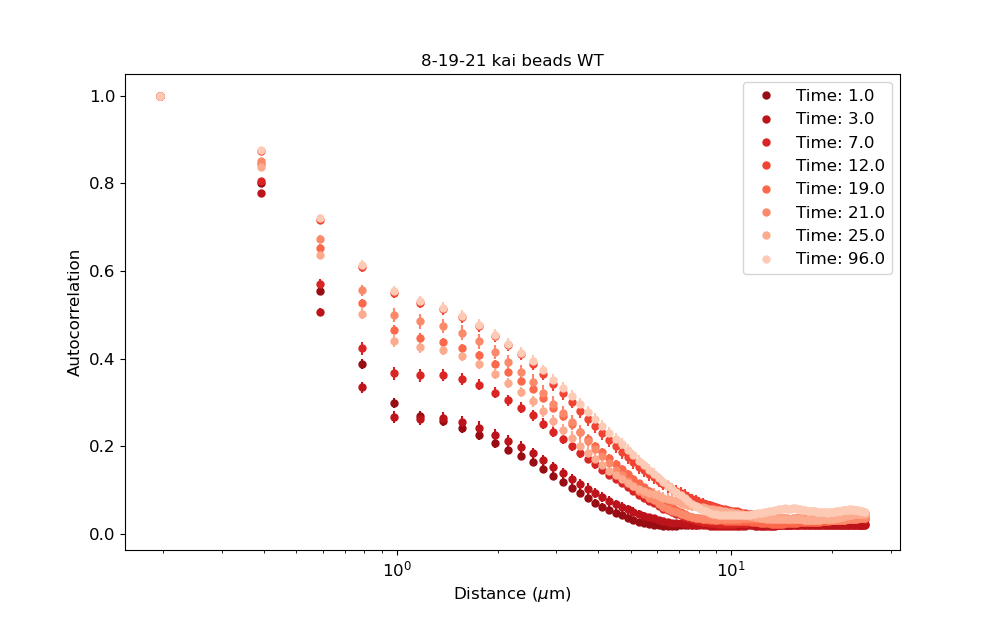

Text(0.5, 1.0, '8-19-21 kai beads WT')

In [57]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Reds')
fig, ax = plt.subplots(figsize=(10,10/1.618))
ax.tick_params(axis='both', which='major', labelsize=12)
markerSize = 10

xscale = np.arange(1,129)*0.196 

for i,thetime in enumerate(times):
    plt.semilogx(xscale, all_avg_ravcorr[i,:,:].mean(axis=0), '.',ms=markerSize,c=cmap(0.9-(i/10)), label="Time: %.1f" % thetime)
    plt.errorbar(xscale, all_avg_ravcorr[i,:,:].mean(axis=0), yerr=all_std_ravcorr[i,:,:].mean(axis=0), fmt='none',  ecolor=cmap(0.9-(i/10)))
    results_dict['x values'] = xscale
    results_dict[str(thetime)] = all_avg_ravcorr[i,:,:].mean(axis=0)
    results_dict[str(thetime)+'_error'] = all_std_ravcorr[i,:,:].mean(axis=0)
    
plt.xlabel("Distance ($\mu$m)",fontsize=12)
plt.ylabel("Autocorrelation",fontsize=12)
plt.legend(loc=0,fontsize=12)

#plt.axhline(y=0.367879441, color='b', linestyle='-')
#plt.axvline(x=0.739, color='g', linestyle='--')

plt.title(exp+" "+kaiC)

In [45]:
fig.savefig(plot_saveto+"//"+kaiC+"_all_avg_autocorrelation__filter=100.png",dpi=600)

np.savetxt(plot_saveto+"//csv data sheets//"+kaiC+"_all_avg_autocorrelation.csv", 
           np.c_[results_dict['x values'], 
                 results_dict['1'], results_dict['1_error'],
                 results_dict['3'], results_dict['3_error'],
                 results_dict['7'], results_dict['7_error'],
                 results_dict['12'], results_dict['12_error'],
                 results_dict['19'], results_dict['19_error'],
                 results_dict['21'], results_dict['21_error'],
                 results_dict['25'], results_dict['25_error'],
                 results_dict['96'], results_dict['96_error']], delimiter=',')

In [23]:
results_dict['1_error']

array([2.69972726e-16, 5.04940963e-03, 1.06188869e-02, 1.32106616e-02,
       1.42682961e-02, 1.49062946e-02, 1.45843011e-02, 1.36955776e-02,
       1.28926127e-02, 1.23012426e-02, 1.26676167e-02, 1.30981728e-02,
       1.32871022e-02, 1.36072051e-02, 1.40743641e-02, 1.44794314e-02,
       1.48873318e-02, 1.47281313e-02, 1.45344838e-02, 1.43438937e-02,
       1.42723571e-02, 1.41610030e-02, 1.40444219e-02, 1.37600189e-02,
       1.34632246e-02, 1.31303003e-02, 1.26370474e-02, 1.23233922e-02,
       1.17081480e-02, 1.16501847e-02, 1.12718799e-02, 1.08683398e-02,
       1.04605880e-02, 9.97105674e-03, 9.84967518e-03, 9.64359260e-03,
       9.23665561e-03, 8.13057199e-03, 7.69407108e-03, 7.36006057e-03,
       7.13786304e-03, 7.02416832e-03, 6.64268251e-03, 6.51217820e-03,
       6.47491440e-03, 6.23029615e-03, 6.01732745e-03, 5.78443522e-03,
       5.81698213e-03, 6.17344714e-03, 5.93760910e-03, 5.57861709e-03,
       5.73403808e-03, 6.26903584e-03, 6.26536636e-03, 6.53944583e-03,
      

<IPython.core.display.Javascript object>


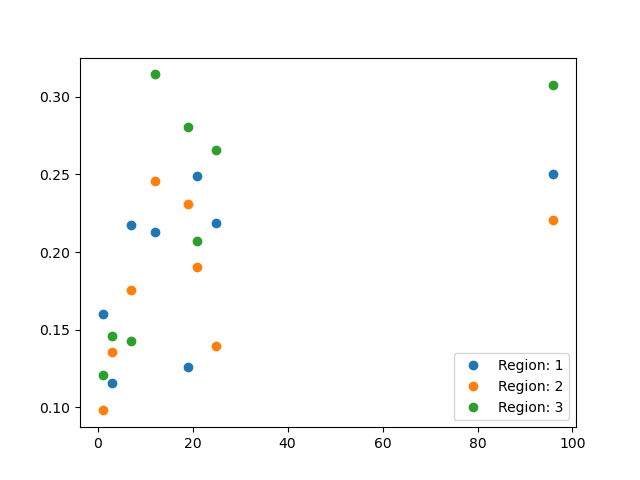

<IPython.core.display.Javascript object>


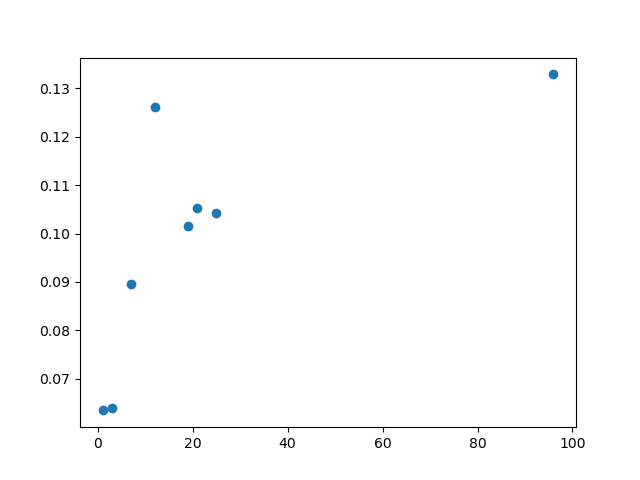

In [56]:
plt.figure()
for i,theregion in enumerate(regions):
    plt.plot(times, all_avg_ravcorr[:,theregion-1,:50].mean(axis=-1), 'o', label="Region: %i" % theregion)
    
plt.legend(loc=0)

plt.figure()
plt.plot(times, all_avg_ravcorr[:,:,:].mean(axis=1).mean(axis=-1), 'o')


In [88]:
len(files)

24

<IPython.core.display.Javascript object>


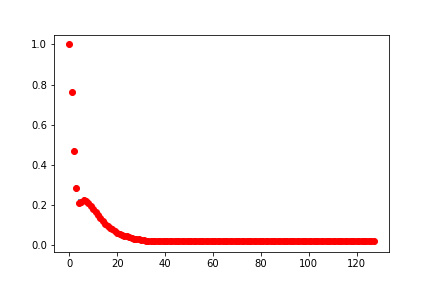

<ErrorbarContainer object of 3 artists>

In [84]:
%matplotlib notebook

plt.figure()
plt.plot(avg_ravcorr,'ro')
plt.errorbar(range(len(avg_ravcorr)), avg_ravcorr, yerr=ravcorrs.std(axis=0), fmt='none')

In [87]:
avg_ravcorr.shape

(128,)

In [4]:
found_file_number = 0
full_filename = files[found_file_number]
data_file = (full_filename.split('\\')[-1])[:-4] #[30:-38]
print(data_file)
print(full_filename)

im_array = [[0.0]*10] * len(files)
avg_im_array = [0.0] * len(files)
corr_im_array = [[0.0]*len(files)] * 10    #corr_im_array = [[0.0]*10] * len(files)
corr_rad_array = [[0.0]*len(files)] * 10   #corr_rad_array = [[0.0]*10] * len(files)
avg_corr_rad_array = [0.0] * len(files)

im_array1 = [0.0] * len(files)
im_array2 = [0.0] * len(files)
im_array3= [0.0] * len(files)
im_array4 = [0.0] * len(files)
im_array5 = [0.0] * len(files)
im_array6= [0.0] * len(files)
im_array7 = [0.0] * len(files)
im_array8 = [0.0] * len(files)
im_array9= [0.0] * len(files)

corr_im_array1 = [0.0] * len(files)
corr_im_array2 = [0.0] * len(files)
corr_im_array3 = [0.0] * len(files)
corr_im_array4 = [0.0] * len(files)
corr_im_array5 = [0.0] * len(files)
corr_im_array6 = [0.0] * len(files)
corr_im_array7 = [0.0] * len(files)
corr_im_array8 = [0.0] * len(files)
corr_im_array9 = [0.0] * len(files)

corr_rad_array1 = [0.0] * len(files)
corr_rad_array2 = [0.0] * len(files)
corr_rad_array3 = [0.0] * len(files)
corr_rad_array4 = [0.0] * len(files)
corr_rad_array5 = [0.0] * len(files)
corr_rad_array6 = [0.0] * len(files)
corr_rad_array7 = [0.0] * len(files)
corr_rad_array8 = [0.0] * len(files)
corr_rad_array9 = [0.0] * len(files)

print(len(files))

area1_files = files[0::3]
area2_files = files[1::3]
area3_files = files[2::3]
area_files_length = int(len(files)/3) 
#print(area3_files)
print(area_files_length)
#print(corr_rad_even)

print(im_array[0][0])

AE_2-42_004
Z:\Gregor L\__Kai Colloids\8-19-21 kai beads\raw tiffs\AE_2-42_004.tif
24
8
0.0


In [5]:
results_dict = {'area 1' : [],
                'area 2' : [],
                'area 3' : [],}
area1_dict = {}
area2_dict = {}
area3_dict = {}

In [6]:
full_filename = area1_files[0]
data_file = (full_filename.split('\\')[-1])[:-4]
print(data_file)
print(len(data_file))
im_arrayyy = tiff_file.imread(data_dir+data_file+".tif",key=0)
print(len(im_arrayyy))

AE_2-42_004
11
256


In [7]:
#Load one frame from all area 1 files
#The 'key' parameter (defined by "frame_num") specifies which frame to load
frame_num = [0]
for i in range(area_files_length): #len(files)):
    full_filename = area1_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    im_array1[i] = tiff_file.imread(data_dir+data_file+".tif",key=frame_num)
    im_array2[i] = tiff_file.imread(data_dir+data_file+".tif",key=1000)
    im_array3[i] = tiff_file.imread(data_dir+data_file+".tif",key=2000)
    im_array4[i] = tiff_file.imread(data_dir+data_file+".tif",key=3000)
    im_array5[i] = tiff_file.imread(data_dir+data_file+".tif",key=4000)
    im_array6[i] = tiff_file.imread(data_dir+data_file+".tif",key=5000)
    im_array7[i] = tiff_file.imread(data_dir+data_file+".tif",key=6000)
    im_array8[i] = tiff_file.imread(data_dir+data_file+".tif",key=7000)
    im_array9[i] = tiff_file.imread(data_dir+data_file+".tif",key=8000)

Shape of ims is 256,256


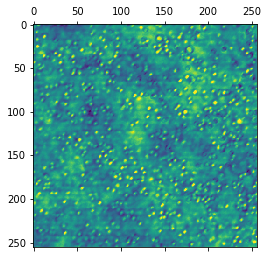

In [8]:
#preview the given frame of a selected area 1 file (defined by "select_file_num")

select_file_num = 1
print("Shape of ims is %i,%i" % im_array1[select_file_num].shape)
plt.matshow(im_array1[select_file_num])

In [ ]:
area1_dict['x values'] = xvalues
area1_dict.update({dict_files[0]: avg_corr_rad_array[0]})
area1_dict.update({dict_files[1]: avg_corr_rad_array[1]})
area1_dict.update({dict_files[2]: avg_corr_rad_array[2]})
area1_dict.update({dict_files[3]: avg_corr_rad_array[3]})
area1_dict.update({dict_files[4]: avg_corr_rad_array[4]})
area1_dict.update({dict_files[5]: avg_corr_rad_array[5]})
area1_dict.update({dict_files[6]: avg_corr_rad_array[6]})
area1_dict.update({dict_files[7]: avg_corr_rad_array[7]})
#area1_dict.update({dict_files[8]: avg_corr_rad_array[8]})

area1_dict.update({dict_files[0]+'_error': y_error[0]})
area1_dict.update({dict_files[1]+'_error': y_error[1]})
area1_dict.update({dict_files[2]+'_error': y_error[2]})
area1_dict.update({dict_files[3]+'_error': y_error[3]})
area1_dict.update({dict_files[4]+'_error': y_error[4]})
area1_dict.update({dict_files[5]+'_error': y_error[5]})
area1_dict.update({dict_files[6]+'_error': y_error[6]})
area1_dict.update({dict_files[7]+'_error': y_error[7]})
#area1_dict.update({dict_files[8]+'_error': y_error[8]})

In [31]:
dict_files = ["" for x in range(area_files_length)]
for i in range(area_files_length):    
    full_filename = area1_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    dict_files[i] = data_file

['', '', '', '', '', '', '', '']
AE_2-42_004
AE_5-14_013
AE_8-22_023
AE_1-52_033
AE_8-48_042
AE_10-53_051
AE_2-48_060
AE_days later_3-08_104


<IPython.core.display.Javascript object>


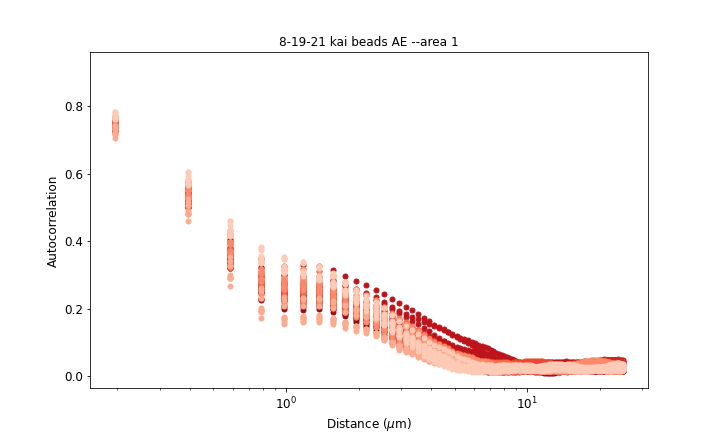

256
0.0005177768471826979
0.001253248469913466
_
0.0012293678700132584
0.003164577071992037
_
0.0008439131204550894
0.0021688613982124155
_
0.0010018408698626604
0.002515654543331561
_
0.0014143225549231352
0.003584501926878533
_
0.0015160251087032066
0.003821822159548708
_
0.0011966071052519963
0.003060505770638824
_
0.0009904196432280999
0.0024528448387560477
_


Text(0.5, 1.0, '8-19-21 kai beads AE --area 1')

In [25]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Reds')

fig, ax = plt.subplots(figsize=(10,10/1.618))

ax.tick_params(axis='both', which='major', labelsize=12)
markerSize = 10
y_error =  [[0.0] * 128] * len(files)
avg_corr_rad_array =  [[0.0] * 128] * len(files)
new_array = [0.0] * len(im_array1)
print(len(im_array1[0]))
#print(y_error[0][0])
for i in range(area_files_length):    
    full_filename = area1_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    corr_im_array1[i], corr_rad_array1[i] = im_corr(im_array1[i],filter=False,filtersize=50)
    corr_im_array2[i], corr_rad_array2[i] = im_corr(im_array2[i],filter=False,filtersize=50)
    corr_im_array3[i], corr_rad_array3[i] = im_corr(im_array3[i],filter=False,filtersize=50)
    corr_im_array4[i], corr_rad_array4[i] = im_corr(im_array4[i],filter=False,filtersize=50)
    corr_im_array5[i], corr_rad_array5[i] = im_corr(im_array5[i],filter=False,filtersize=50)
    corr_im_array6[i], corr_rad_array6[i] = im_corr(im_array6[i],filter=False,filtersize=50)
    corr_im_array7[i], corr_rad_array7[i] = im_corr(im_array7[i],filter=False,filtersize=50)
    corr_im_array8[i], corr_rad_array8[i] = im_corr(im_array8[i],filter=False,filtersize=50)
    corr_im_array9[i], corr_rad_array9[i] = im_corr(im_array9[i],filter=False,filtersize=50)
    xvalues = np.arange(len(corr_rad_array1[i]))*0.196 
    for j in range(len(corr_rad_array1[i])):
        avg_corr_rad_array[i][j] = (gf1d(corr_rad_array1[i],1)[j] + gf1d(corr_rad_array2[i],1)[j] + gf1d(corr_rad_array3[i],1)[j]
                                   + gf1d(corr_rad_array4[i],1)[j] + gf1d(corr_rad_array5[i],1)[j] + gf1d(corr_rad_array6[i],1)[j]
                                   + gf1d(corr_rad_array7[i],1)[j] + gf1d(corr_rad_array8[i],1)[j] + gf1d(corr_rad_array9[i],1)[j])/9
        y_error[i][j] = (np.std([gf1d(corr_rad_array1[i],1)[j], gf1d(corr_rad_array2[i],1)[j], gf1d(corr_rad_array3[i],1)[j],
                                gf1d(corr_rad_array4[i],1)[j], gf1d(corr_rad_array5[i],1)[j], gf1d(corr_rad_array5[i],1)[j],
                                gf1d(corr_rad_array7[i],1)[j], gf1d(corr_rad_array8[i],1)[j], gf1d(corr_rad_array9[i],1)[j]]))/np.sqrt(9)
    #print(gf1d(corr_rad_array1[i],1)[0])
    #print(gf1d(corr_rad_array2[i],1)[0])
    #print(gf1d(corr_rad_array3[i],1)[0])
    print(y_error[i][0])
    print(y_error[i][1])
    print('_')
    plt.semilogx(xvalues, gf1d(corr_rad_array1[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    plt.semilogx(xvalues, gf1d(corr_rad_array2[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    plt.semilogx(xvalues, gf1d(corr_rad_array3[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    plt.semilogx(xvalues, gf1d(corr_rad_array4[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    plt.semilogx(xvalues, gf1d(corr_rad_array5[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    plt.semilogx(xvalues, gf1d(corr_rad_array6[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    plt.semilogx(xvalues, gf1d(corr_rad_array7[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    plt.semilogx(xvalues, gf1d(corr_rad_array8[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    plt.semilogx(xvalues, gf1d(corr_rad_array9[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    #plt.errorbar(xvalues, avg_corr_rad_array[i], yerr = y_error[i], fmt ='none', ecolor=cmap(0.9-(i/10)))
    area1_dict['x values'] = xvalues
    area1_dict[data_file] = avg_corr_rad_array[i]
    area1_dict[data_file+'_error'] = y_error[i]

results_dict['area 1'] = area1_dict
    
plt.xlabel("Distance ($\mu$m)",fontsize=12)
plt.ylabel("Autocorrelation",fontsize=12)
#plt.legend(loc=0,fontsize=12)

#plt.xlim(0.14, 20)
plt.title(exp+" "+kaiC+" --area 1")
#ax.set_xticks([1.0, 10, 40])
#ax.set_xticklabels(['1.0','10','40'], fontsize=12)

<IPython.core.display.Javascript object>


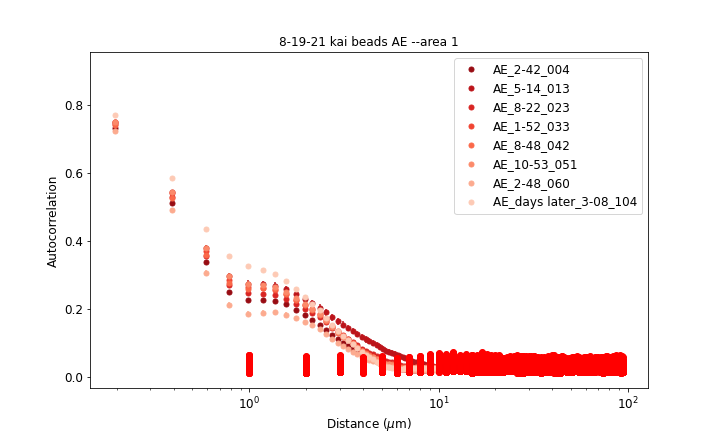

256
8
0.895020326014614
_
0.9026669221533664
_
0.9026669221533664
0.9097334857620817
0.9097334857620817


Text(0.5, 1.0, '8-19-21 kai beads AE --area 1')

In [65]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Reds')

fig, ax = plt.subplots(figsize=(10,10/1.618))

ax.tick_params(axis='both', which='major', labelsize=12)
markerSize = 10
y_error =  [[0.0] * 128] * len(files)
avg_corr_rad_array =  [[0.0] * 128] * len(files)
new_array = [0.0] * len(im_array1)
print(len(im_array1[0]))

curve1 = [0.0] * 128
curve2 = [0.0] * 128
curve3 = [0.0] * 128
curve4 = [0.0] * 128
curve5 = [0.0] * 128
curve6 = [0.0] * 128
curve7 = [0.0] * 128
curve8 = [0.0] * 128
curve0 = [0.0] * 128
k=0

print(area_files_length)
dict_files = ["" for x in range(area_files_length)]
for i in range(area_files_length):    
    full_filename = area1_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    dict_files[i] = data_file

for i in range(area_files_length):    
    corr_im_array1[i], corr_rad_array1[i] = im_corr(im_array1[i],filter=False,filtersize=50)
    corr_im_array2[i], corr_rad_array2[i] = im_corr(im_array2[i],filter=False,filtersize=50)
    corr_im_array3[i], corr_rad_array3[i] = im_corr(im_array3[i],filter=False,filtersize=50)
    corr_im_array4[i], corr_rad_array4[i] = im_corr(im_array4[i],filter=False,filtersize=50)
    corr_im_array5[i], corr_rad_array5[i] = im_corr(im_array5[i],filter=False,filtersize=50)
    corr_im_array6[i], corr_rad_array6[i] = im_corr(im_array6[i],filter=False,filtersize=50)
    corr_im_array7[i], corr_rad_array7[i] = im_corr(im_array7[i],filter=False,filtersize=50)
    corr_im_array8[i], corr_rad_array8[i] = im_corr(im_array8[i],filter=False,filtersize=50)
    corr_im_array9[i], corr_rad_array9[i] = im_corr(im_array9[i],filter=False,filtersize=50)
    xvalues = np.arange(len(corr_rad_array1[i]))*0.196 
    for j in range(len(corr_rad_array1[i])):
        avg_corr_rad_array[k][j] = (gf1d(corr_rad_array1[i],1)[j] + gf1d(corr_rad_array2[i],1)[j] + gf1d(corr_rad_array3[i],1)[j]
                                   + gf1d(corr_rad_array4[i],1)[j] + gf1d(corr_rad_array5[i],1)[j] + gf1d(corr_rad_array6[i],1)[j]
                                   + gf1d(corr_rad_array7[i],1)[j] + gf1d(corr_rad_array8[i],1)[j] + gf1d(corr_rad_array9[i],1)[j])/9
        y_error[k][j] = (np.std([gf1d(corr_rad_array1[i],1)[j], gf1d(corr_rad_array2[i],1)[j], gf1d(corr_rad_array3[i],1)[j],
                                gf1d(corr_rad_array4[i],1)[j], gf1d(corr_rad_array5[i],1)[j], gf1d(corr_rad_array5[i],1)[j],
                                gf1d(corr_rad_array7[i],1)[j], gf1d(corr_rad_array8[i],1)[j], gf1d(corr_rad_array9[i],1)[j]]))/np.sqrt(9)
    #print(gf1d(corr_rad_array1[i],1))
    plt.semilogx(xvalues, avg_corr_rad_array[k],'.',ms=markerSize,c=cmap(0.9-(i/10)),label=dict_files[i])
    plt.errorbar(xvalues, avg_corr_rad_array[k], yerr = y_error[k], fmt ='none', ecolor=cmap(0.9-(i/10)))
    if k == 0:
        curve0 = avg_corr_rad_array[k]
        area1_dict.update({dict_files[k]: curve0})
        print(curve0[0])
        print('_')
        #print(curve0[1])
    elif k == 1:
        curve1 = avg_corr_rad_array[k]
        area1_dict.update({dict_files[k]: curve1})
        print(curve0[0])
        print('_')
        print(curve1[0])
    elif k == 2:
        curve2 = avg_corr_rad_array[k]
        area1_dict.update({dict_files[k]: curve2})
    elif k == 3:
        curve3 = avg_corr_rad_array[k]
        area1_dict.update({dict_files[k]: curve3})
    elif k == 4:
        curve4 = avg_corr_rad_array[k]
        area1_dict.update({dict_files[k]: curve4})
    elif k == 5:
        curve5 = avg_corr_rad_array[k]
        area1_dict.update({dict_files[k]: curve5})
    elif k == 6:
        curve6 = avg_corr_rad_array[k]
        area1_dict.update({dict_files[k]: curve6})
    elif k == 7:
        curve7 = avg_corr_rad_array[k]
        area1_dict.update({dict_files[k]: curve7})
    elif k == 8:
        curve8 = avg_corr_rad_array[k]
        area1_dict.update({dict_files[k]: curve8})

    results_dict['area 1'] = area1_dict
    #print(avg_corr_rad_array[k][0])
    k = k + 1
print(curve1[0])
print(curve2[0])

#for i in range(area_files_length):    
    #print(avg_corr_rad_array[i][0])
#print(avg_corr_rad_array[:][0])
#print(avg_corr_rad_array[0][:])
#print(avg_corr_rad_array)



    
plt.xlabel("Distance ($\mu$m)",fontsize=12)
plt.ylabel("Autocorrelation",fontsize=12)
plt.legend(loc=0,fontsize=12)

#plt.xlim(0.14, 20)
plt.title(exp+" "+kaiC+" --area 1")
#ax.set_xticks([1.0, 10, 40])
#ax.set_xticklabels(['1.0','10','40'], fontsize=12)

In [59]:
results_dict

{'area 1': {'x values': array([ 0.   ,  0.196,  0.392,  0.588,  0.784,  0.98 ,  1.176,  1.372,
          1.568,  1.764,  1.96 ,  2.156,  2.352,  2.548,  2.744,  2.94 ,
          3.136,  3.332,  3.528,  3.724,  3.92 ,  4.116,  4.312,  4.508,
          4.704,  4.9  ,  5.096,  5.292,  5.488,  5.684,  5.88 ,  6.076,
          6.272,  6.468,  6.664,  6.86 ,  7.056,  7.252,  7.448,  7.644,
          7.84 ,  8.036,  8.232,  8.428,  8.624,  8.82 ,  9.016,  9.212,
          9.408,  9.604,  9.8  ,  9.996, 10.192, 10.388, 10.584, 10.78 ,
         10.976, 11.172, 11.368, 11.564, 11.76 , 11.956, 12.152, 12.348,
         12.544, 12.74 , 12.936, 13.132, 13.328, 13.524, 13.72 , 13.916,
         14.112, 14.308, 14.504, 14.7  , 14.896, 15.092, 15.288, 15.484,
         15.68 , 15.876, 16.072, 16.268, 16.464, 16.66 , 16.856, 17.052,
         17.248, 17.444, 17.64 , 17.836, 18.032, 18.228, 18.424, 18.62 ,
         18.816, 19.012, 19.208, 19.404, 19.6  , 19.796, 19.992, 20.188,
         20.384, 20.58 , 20.7

In [18]:
fig.savefig(plot_saveto+"//"+kaiC+"_avg_area1_autocorrelation_frame"+str(frame_num)+".png",dpi=600)
np.savetxt(plot_saveto+"//csv data sheets//"+kaiC+"_area1_autocorrelation_frame"+str(frame_num)+'.csv', 
           np.c_[xvalues, avg_corr_rad_array[0], avg_corr_rad_array[1], avg_corr_rad_array[2],
                 avg_corr_rad_array[3],avg_corr_rad_array[4],avg_corr_rad_array[5],
                 avg_corr_rad_array[6],avg_corr_rad_array[7],avg_corr_rad_array[8]], delimiter=',')


{'area 1': {'x values': array([ 0.   ,  0.196,  0.392,  0.588,  0.784,  0.98 ,  1.176,  1.372,
          1.568,  1.764,  1.96 ,  2.156,  2.352,  2.548,  2.744,  2.94 ,
          3.136,  3.332,  3.528,  3.724,  3.92 ,  4.116,  4.312,  4.508,
          4.704,  4.9  ,  5.096,  5.292,  5.488,  5.684,  5.88 ,  6.076,
          6.272,  6.468,  6.664,  6.86 ,  7.056,  7.252,  7.448,  7.644,
          7.84 ,  8.036,  8.232,  8.428,  8.624,  8.82 ,  9.016,  9.212,
          9.408,  9.604,  9.8  ,  9.996, 10.192, 10.388, 10.584, 10.78 ,
         10.976, 11.172, 11.368, 11.564, 11.76 , 11.956, 12.152, 12.348,
         12.544, 12.74 , 12.936, 13.132, 13.328, 13.524, 13.72 , 13.916,
         14.112, 14.308, 14.504, 14.7  , 14.896, 15.092, 15.288, 15.484,
         15.68 , 15.876, 16.072, 16.268, 16.464, 16.66 , 16.856, 17.052,
         17.248, 17.444, 17.64 , 17.836, 18.032, 18.228, 18.424, 18.62 ,
         18.816, 19.012, 19.208, 19.404, 19.6  , 19.796, 19.992, 20.188,
         20.384, 20.58 , 20.7

In [121]:
#Load one frame from all area 2 files
#The 'key' parameter (defined by "frame_num") specifies which frame to load
frame_num = [0]
for i in range(area_files_length): #len(files)):
    full_filename = area2_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    im_array[i+area_files_length] = tiff_file.imread(data_dir+data_file+".tif",key=frame_num)

Shape of ims is 256,256


<IPython.core.display.Javascript object>


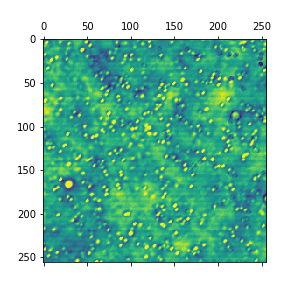

In [122]:
#preview the given frame of a selected area 2 file (defined by "select_file_num")
select_file_num = 14
print("Shape of ims is %i,%i" % im_array[select_file_num].shape)
plt.matshow(im_array[select_file_num])

<IPython.core.display.Javascript object>


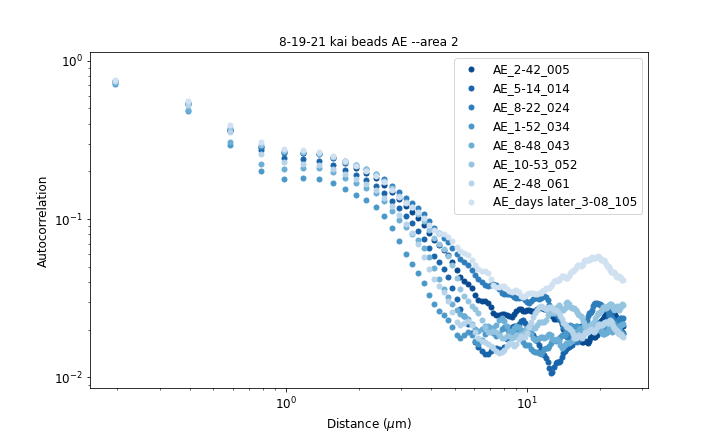

Text(0.5, 1.0, '8-19-21 kai beads AE --area 2')

In [127]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Blues')

fig, ax = plt.subplots(figsize=(10,10/1.618))
ax.tick_params(axis='both', which='major', labelsize=12)
markerSize = 10

for i in range(area_files_length):    
    full_filename = area2_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    corr_im_array[i], corr_rad_array[i] = im_corr(im_array[i+area_files_length],filter=False,filtersize=50)
    xvalues = np.arange(len(corr_rad_array[0]))*0.196  
    #plt.semilogx(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    #plt.semilogy(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    plt.loglog(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    area2_dict['x values'] = xvalues
    area2_dict[data_file] = gf1d(corr_rad_array[i],1)

results_dict['area 2'] = area2_dict

plt.xlabel("Distance ($\mu$m)",fontsize=12)
plt.ylabel("Autocorrelation",fontsize=12)
plt.legend(loc=0,fontsize=12)

#plt.xlim(0.14, 20)
plt.title(exp+" "+data_file[:-20]+" --area 2")
#ax.set_xticks([1.0, 10, 40])
#ax.set_xticklabels(['1.0','10','40'], fontsize=12)

In [91]:
fig.savefig(plot_saveto+"//"+kaiC+"_area2_autocorrelation_frame"+str(frame_num)+".png",dpi=600)
np.savetxt(plot_saveto+"//"+kaiC+"_area2_autocorrelation_frame"+str(frame_num)+'.csv', 
           np.c_[xvalues, gf1d(corr_rad_array[0],1),gf1d(corr_rad_array[1],1),gf1d(corr_rad_array[2],1),gf1d(corr_rad_array[3],1),gf1d(corr_rad_array[4],1),gf1d(corr_rad_array[5],1),gf1d(corr_rad_array[6],1),gf1d(corr_rad_array[7],1)], delimiter=',')

In [128]:
#Load one frame from all area 3 files
#The 'key' parameter (defined by "frame_num") specifies which frame to load
frame_num = [0]
for i in range(area_files_length): #len(files)):
    full_filename = area3_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    im_array[i+(area_files_length*2)] = tiff_file.imread(data_dir+data_file+".tif",key=frame_num)


Shape of ims is 256,256


<IPython.core.display.Javascript object>


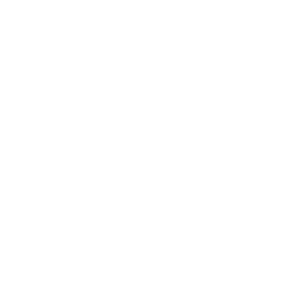

In [129]:
#preview the given frame of a selected area 3 file (defined by "select_file_num")
select_file_num = 16
print("Shape of ims is %i,%i" % im_array[select_file_num].shape)
plt.matshow(im_array[select_file_num])

<IPython.core.display.Javascript object>


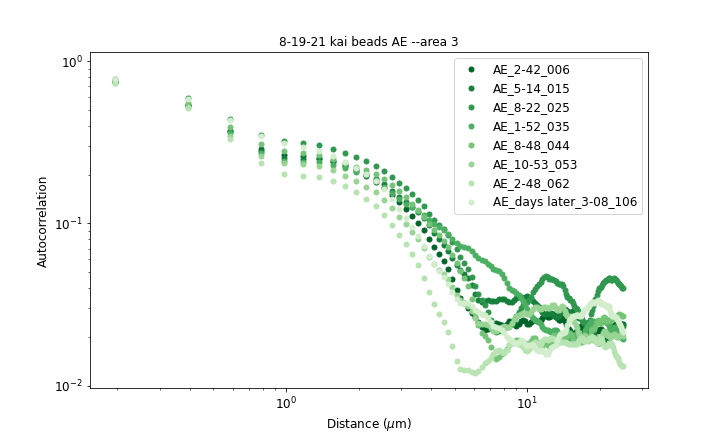

Text(0.5, 1.0, '8-19-21 kai beads AE --area 3')

In [132]:
%matplotlib notebook
cmap = matplotlib.cm.get_cmap('Greens')

fig, ax = plt.subplots(figsize=(10,10/1.618))
ax.tick_params(axis='both', which='major', labelsize=12)
markerSize = 10

for i in range(area_files_length):    
    full_filename = area3_files[i]
    data_file = (full_filename.split('\\')[-1])[:-4]
    corr_im_array[i], corr_rad_array[i] = im_corr(im_array[i+(area_files_length*2)],filter=False,filtersize=50)
    xvalues = np.arange(len(corr_rad_array[0]))*0.196 
    plt.semilogx(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    #plt.semilogy(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    #plt.loglog(xvalues, gf1d(corr_rad_array[i],1),'.',ms=markerSize,c=cmap(0.9-(i/10)),label=data_file)
    area3_dict['x values'] = xvalues
    area3_dict[data_file] = gf1d(corr_rad_array[i],1)

results_dict['area 3'] = area3_dict

plt.xlabel("Distance ($\mu$m)",fontsize=12)
plt.ylabel("Autocorrelation",fontsize=12)
plt.legend(loc=0,fontsize=12)

#plt.xlim(0.14, 20)
plt.title(exp+" "+kaiC+" --area 3")
#ax.set_xticks([1.0, 10, 40])
#ax.set_xticklabels(['1.0','10','40'], fontsize=12)

In [95]:
fig.savefig(plot_saveto+"//"+kaiC+"_area3_autocorrelation_frame"+str(frame_num)+".png",dpi=600)
np.savetxt(plot_saveto+"//"+kaiC+"_area3_autocorrelation_frame"+str(frame_num)+'.csv', 
           np.c_[xvalues, gf1d(corr_rad_array[0],1),gf1d(corr_rad_array[1],1),gf1d(corr_rad_array[2],1),gf1d(corr_rad_array[3],1),gf1d(corr_rad_array[4],1),gf1d(corr_rad_array[5],1),gf1d(corr_rad_array[6],1),gf1d(corr_rad_array[7],1)], delimiter=',')

In [96]:
file_to_write = open(plot_saveto+"//"+kaiC + "_SIA_results.p", "wb")
pickle.dump(results_dict, file_to_write)

In [75]:
#pickle.load(open(plot_saveto+"//"+kaiC + "_SIA_results.p",'rb')) 